In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Smarket.csv",index_col=0)
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
data.shape

(1250, 9)

In [4]:
data.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [5]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [6]:
data.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [7]:
data['Direction'].value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

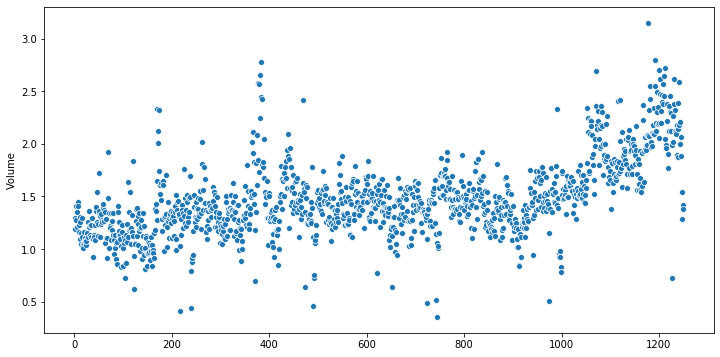

In [8]:
plt.figure(figsize = (12,6))
sns.scatterplot(data.index,data['Volume'])

In [9]:
import statsmodels.api as sm
data_orig = data.copy()
data['Direction'] = data['Direction'].map({'Down':0,'Up':1})

In [10]:
X = data.iloc[:,1:-2]
X = sm.add_constant(X)
y = data['Direction']
results = sm.Logit(y,X).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                0.002074
Time:                        16:57:05   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

In [12]:
pred=results.predict(X)[:10]
pred

1     0.507084
2     0.481468
3     0.481139
4     0.515222
5     0.510781
6     0.506956
7     0.492651
8     0.509229
9     0.517614
10    0.488838
dtype: float64

In [13]:
predicted_classes = np.where(pred <=0.5,'Down','Up')
pd.DataFrame({'Probabilities':pred,'Classes':predicted_classes})

,Probabilities,Classes
1,0.507084,Up
2,0.481468,Down
3,0.481139,Down
4,0.515222,Up
5,0.510781,Up
6,0.506956,Up
7,0.492651,Down
8,0.509229,Up
9,0.517614,Up
10,0.488838,Down


In [16]:
predict_y=np.where(results.predict(X)<=0.5,0,1)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y,predict_y)
cm

array([[145, 457],
       [141, 507]], dtype=int64)

In [19]:
per_correct=(cm[0][0]+cm[1][1])/data.shape[0]
per_correct

0.5216

In [20]:
train = data[data['Year']<2005]
test = data[data['Year'] == 2005]
print('Shape of train is',train.shape)
print('Shape of test is ',test.shape)

Shape of train is (998, 9)
Shape of test is  (252, 9)


In [27]:
X_train = train.iloc[:,1:-2]
X_train = sm.add_constant(X_train)
y_train = train['Direction']

X_test = test.iloc[:,1:-2]
X_test = sm.add_constant(X_test)
y_test = test['Direction']

In [28]:
results = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


In [29]:
pred_test = results.predict(X_test)

In [30]:
pred_classes = np.where(pred_test > 0.5,1,0)
cm = confusion_matrix(y_test,pred_classes)
cm


array([[77, 34],
       [97, 44]], dtype=int64)

In [31]:
accuracy = accuracy_score(y_test,pred_classes)
print('Accuracy is ',accuracy)

Accuracy is  0.4801587301587302


In [32]:
predictors = ['Lag1','Lag2']
X_train = train[predictors]
X_train = sm.add_constant(X_train)

X_test = test[predictors]
X_test = sm.add_constant(X_test)


In [33]:
results = sm.Logit(y_train,X_train).fit()
pred_test = results.predict(X_test)

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


In [34]:
pred_classes = np.where(pred_test > 0.5,1,0)
cm = confusion_matrix(y_test,pred_classes)
cm

array([[ 35,  76],
       [ 35, 106]], dtype=int64)

In [35]:
accuracy = accuracy_score(y_test,pred_classes)
print('Accuracy is ',accuracy)

Accuracy is  0.5595238095238095


In [36]:
results.predict([[1,1.2,1.1],
                 [1,1.5,-0.8]])

array([0.47914624, 0.49609387])

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [38]:
predictors = ['Lag1','Lag2']

X_train = train[predictors]
X_test = test[predictors]

lda = LDA()

lda.fit(X_train,y_train)
pred = lda.predict(X_test)

In [39]:
print('Prior Probs are - ',lda.priors_)
print('Class Means are  - ',lda.means_)
print('Coeff are - ',lda.coef_)

Prior Probs are -  [0.49198397 0.50801603]
Class Means are  -  [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
Coeff are -  [[-0.05544078 -0.0443452 ]]


In [40]:
cm = confusion_matrix(y_test,pred)
print(cm)

[[ 35  76]
 [ 35 106]]


In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [42]:
qda = QDA()
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [43]:
print('Mean for class 0 is - ',qda.means_[0])
print('Mean for class 1 is - ',qda.means_[1])
print('Prior probalbilities - ',qda.priors_)

Mean for class 0 is -  [0.04279022 0.03389409]
Mean for class 1 is -  [-0.03954635 -0.03132544]
Prior probalbilities -  [0.49198397 0.50801603]


In [44]:
pred = qda.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)

[[ 30  81]
 [ 20 121]]
